# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

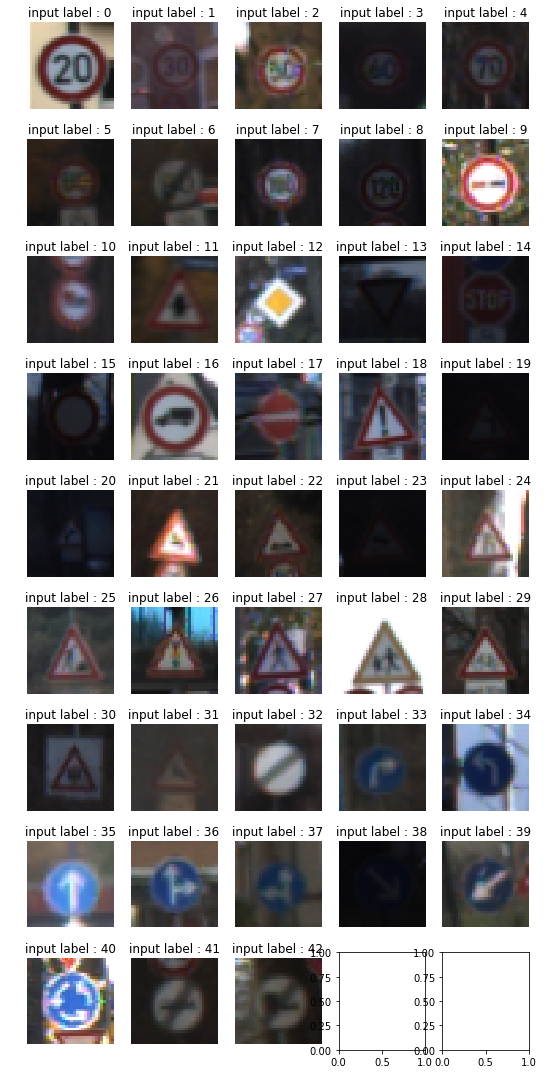

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig,axs=plt.subplots(9,5,figsize=(9, 19))
axs=axs.ravel()
cls, cnt = np.unique(y_train, return_counts=True)

for i in cls:
    class_indices = np.where(y_train == i)
    #print(class_indices[0][0])
    #print(X_train[class_indices[0][0]].shape)
    img=X_train[class_indices[0][0]]
    axs[i].imshow(img.squeeze(),cmap='gray')
    axs[i].axis('off')
    axs[i].set_title('input label : {}'.format(i))

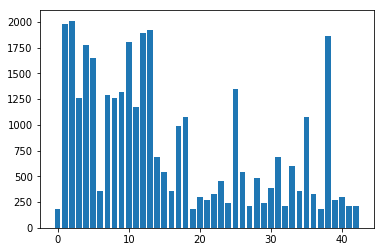

In [4]:
# cnt of cls 
cls, cnt = np.unique(y_train, return_counts=True)
plt.bar(cls, cnt)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [22]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [5]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
y_train_rgb=y_train
X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)


X_train = X_train_gry

X_valid=X_valid_gry
X_test = X_test_gry

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


In [6]:
X_train = X_train_gry

X_valid=X_valid_gry
X_test = X_test_gry
print(np.mean(X_train))

82.677589037


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

Dataset preprocessing consisted of:
1. Conversion to grayscale - As described in the paper by LeCun Converting the data to gray scale provides better accuracy. Also the number of operations are reduced as gray scale is only of depth 1 as compared to depth of 3 in RGB images. However LeCun's implementation also utilizes Y channel, which I would like to implement in future. 
2. Normalizing the data - As expalined in the video lessons it is easy to converge on a local minima when the data has a mean between (-1,1). Thus the normalization of data is applied as follows 'X_train_normalized = (X_train - 128)/128 '

#### Data Augmentation functions

As mentioned in paper by LeCun, Data Augmentation can not only boost accuracy, but also can add some amount of robustness to the model. Following are the data Augmentaion functions:

1. rand_rot   : Applies random rotation of range (-15,15) deg.
2. rand_trans : Jitters the image by (+2,-2) pixels in random directions
3. rand_scal  : In real world samples, the traffic sign images can be of multiple scales, this function augments the existing images to produce multiple scales of the same.
4. random_brightness : Adjusts the image brightness

(32, 32, 1)
angle :  11
shape in/out: (32, 32, 1) (32, 32, 1)
dx,dy :  1 0
shape in/out: (32, 32, 1) (32, 32, 1)
shape in/out: (32, 32, 1) (32, 32, 1)
brightness: 0.04571962027315515
shape in/out: (32, 32, 1) (32, 32, 1)
13
dx,dy :  1 0
angle :  11
brightness: 0.04571962027315515
dx,dy :  1 0
angle :  11
brightness: 0.04571962027315515
done


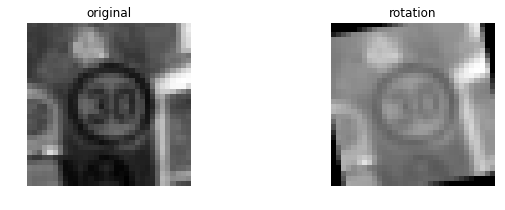

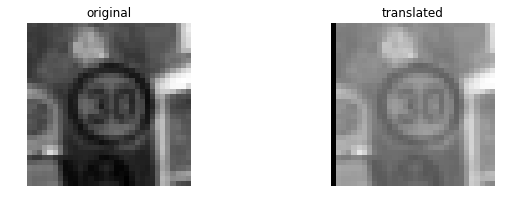

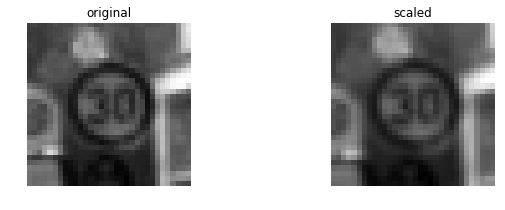

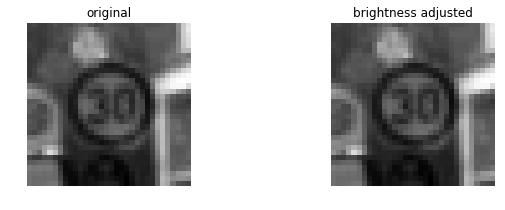

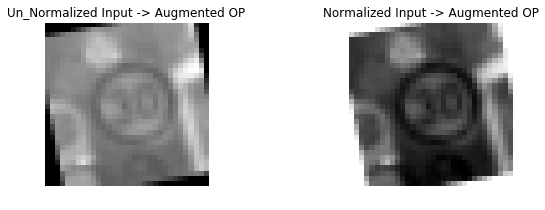

In [48]:
import cv2
#X_train_normalized=X_train
indexs=np.argwhere(y_train==1)
test_img = X_train_gry[indexs[0]]
test_img=test_img[0,:,:,:]
#test_img=(test_img-128)/128
print(test_img.shape)
#

def rand_rot(image):
    angle=15
    angle=np.random.randint(-angle,angle)
    
    #angle=11
    print('angle : ', angle)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    image = cv2.warpAffine(image, M, (w, h))
    image=image[:,:,np.newaxis]
    return image

test_dst = rand_rot(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('rotation')

print('shape in/out:', test_img.shape, test_dst.shape)





def rand_trans(img):
    h,w= img.shape[:2]
    jitterpx = 2
    dx,dy = np.random.randint(-jitterpx,jitterpx,2)
    #dx=1
    #dy=0
    print('dx,dy : ' , dx,dy)
    M = np.float32([[1,0,dx],[0,1,dy]])
    img = cv2.warpAffine(img,M,(w,h))
    img = img[:,:,np.newaxis]
    return img



#test_img = X_train_normalized[22222]
test_dst = rand_trans(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)


def rand_scal(img):   
    h,w= img.shape[:2]
    # jitter pixels
    jitterpx = np.random.randint(-2,2)
    #src points
    pts1 = np.float32([[jitterpx,jitterpx],[h-jitterpx,jitterpx],[jitterpx,w-jitterpx],[h-jitterpx,w-jitterpx]])
    #print(pts1)
    #dst points
    pts2 = np.float32([[0,0],[h,0],[0,w],[h,w]])
    #print(pts2)
    M = cv2.getPerspectiveTransform(pts1,pts2)
    img = cv2.warpPerspective(img,M,(h,w))
    img = img[:,:,np.newaxis]
    return img
#test_img = X_train_normalized[22222]
test_dst = rand_scal(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)


def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    #coef=0.04571962027315515
    print('brightness:',coef)
    dst = shifted * coef - 1.0
    return dst
#test_img = X_train_normalized[22222]
test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)
print(y_train[22222])

fig, axs = plt.subplots(1,2, figsize=(10, 3))
#axs=axs.ravel()
test_dst=random_brightness(rand_rot(rand_trans(rand_scal(test_img))))
test_dst=(test_dst-128)/128
axs[0].axis('off')
axs[0].imshow(test_dst.squeeze(),cmap='gray')
axs[0].set_title('Un_Normalized Input -> Augmented OP')
test_img_normed=(test_img-128)/128
#fig, axs = plt.subplots(1,2, figsize=(10, 3))
#axs=axs.ravel()
test_dst=random_brightness(rand_rot(rand_trans(rand_scal(test_img_normed))))
axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(),cmap='gray')
axs[1].set_title('Normalized Input -> Augmented OP')

print('done')

**Note**

It has been observed that augmentation results vary when an un-normalised input image is augmented as compared to when a normalised input is augmented.

The issue is under study. My intution is it is just the overall scale of image which gets modified, however the convlution results for both the images might be similar.

(32, 32, 1)
brightness: 0.04571962027315515
angle :  11
dx,dy :  1 0
UnNormedIPMax -0.9644555065882913
UnNormedIPMean -0.9851640008184144
(32, 32, 1)
brightness: 0.04571962027315515
angle :  11
dx,dy :  1 0
NormedIPMax 0.0
NormedIPMean -0.8822949965004752
done


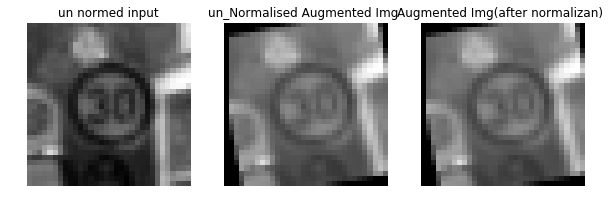

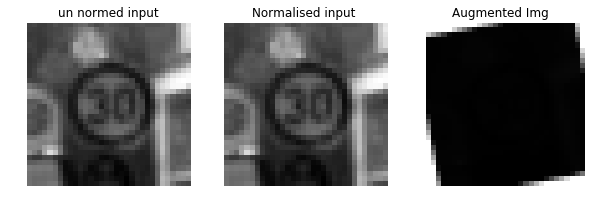

In [49]:
indexs=np.argwhere(y_train==1)
test_img = X_train_gry[indexs[0]]
test_img=test_img[0,:,:,:]
print(test_img.shape)

test_dst=rand_trans((rand_rot(random_brightness(test_img))))
test_dst_normed=(test_dst-128)/128
fig, axs = plt.subplots(1,3, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('un normed input')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('un_Normalised Augmented Img ')

axs[2].axis('off')
axs[2].imshow(test_dst_normed.squeeze(), cmap='gray')
axs[2].set_title('Augmented Img(after normalizan) ')
print('UnNormedIPMax {}'.format(np.max(test_dst_normed)))
print('UnNormedIPMean {}'.format(np.mean(test_dst_normed)))



indexs=np.argwhere(y_train==1)
test_img = X_train_gry[indexs[0]]
test_img=test_img[0,:,:,:]
print(test_img.shape)

test_img_normed=(test_img-128)/128
test_dst=rand_trans((rand_rot(random_brightness(test_img_normed))))
#test_dst_normed=(test_dst-128)/128
fig, axs = plt.subplots(1,3, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('un normed input')

axs[1].axis('off')
axs[1].imshow(test_img_normed.squeeze(), cmap='gray')
axs[1].set_title('Normalised input ')

axs[2].axis('off')
axs[2].imshow(test_dst.squeeze(), cmap='gray')
axs[2].set_title('Augmented Img ')
print('NormedIPMax {}'.format(np.max(test_dst)))
print('NormedIPMean {}'.format(np.mean(test_dst)))

print('done')

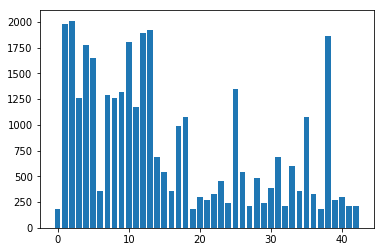

X, y shapes: (34799, 32, 32, 1) (34799,)
Class :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Count :  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [8]:
# cnt of cls 
X_train_normalized=X_train
cls, cnt = np.unique(y_train, return_counts=True)
plt.bar(cls, cnt)
plt.show()
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

print('Class : ', cls)

print('Count : ', cnt)

In [ ]:
####This cell is augmentation data generator.

##Donot run this cell


print('X, y shapes:', X_train_normalized.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 900:
        for i in range(900 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = rand_trans(rand_scal(rand_rot(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

In [32]:
####This cell is for augmentation data saving.

##Donot run this cell

exportDict={"X_train_normalized":X_train_normalized,"y_train":y_train}

pickle_out = open("augData_nonNorm.pickle","wb")
pickle.dump(exportDict, pickle_out)
pickle_out.close()

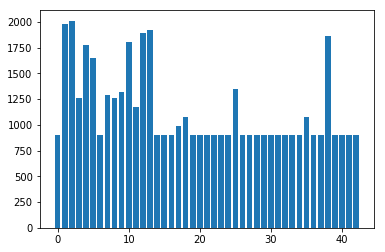

X, y shapes: (49080, 32, 32, 1) (49080,)
Class :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Count :  [ 900 1980 2010 1260 1770 1650  900 1290 1260 1320 1800 1170 1890 1920  900
  900  900  990 1080  900  900  900  900  900  900 1350  900  900  900  900
  900  900  900  900  900 1080  900  900 1860  900  900  900  900]
57.5264931088


In [15]:
##Run this cell to load the augmented data


with open("augData_nonNorm.pickle", mode='rb') as f:
    test = pickle.load(f)
    
X_train_normalized, y_train = test['X_train_normalized'], test['y_train']

# cnt of cls 
cls, cnt = np.unique(y_train, return_counts=True)
plt.bar(cls, cnt)
plt.show()

print('X, y shapes:', X_train_normalized.shape, y_train.shape)


print('Class : ', cls)

print('Count : ', cnt)

print(np.mean(X_train_normalized))

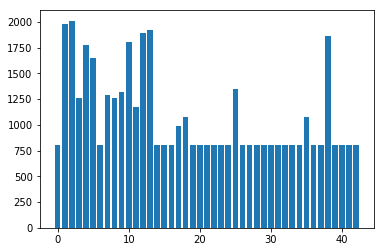

X, y shapes: (46480, 32, 32, 1) (46480,)
Class :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Count :  [ 800 1980 2010 1260 1770 1650  800 1290 1260 1320 1800 1170 1890 1920  800
  800  800  990 1080  800  800  800  800  800  800 1350  800  800  800  800
  800  800  800  800  800 1080  800  800 1860  800  800  800  800]
-0.291563833957


In [9]:
## run this cell to laod second augmented data

with open("augData.pickle", mode='rb') as f:
    test = pickle.load(f)
    
X_train_normalized2, y_train2 = test['X_train_normalized'], test['y_train']

# cnt of cls 
cls, cnt = np.unique(y_train2, return_counts=True)
plt.bar(cls, cnt)
plt.show()

print('X, y shapes:', X_train_normalized2.shape, y_train2.shape)


print('Class : ', cls)

print('Count : ', cnt)

print(np.mean(X_train_normalized2))

In [19]:
## Normalize the train and test datasets to (-1,1)
print(np.mean(X_train_normalized))
X_train_normalized = (X_train_normalized - 128)/128 
X_valid_normalized = (X_valid - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
#print(np.mean(X_test_normalized))



57.5264931088
-0.550574272587


In [21]:
### Combining the 2 augmented data to X_train array

X_train=X_train_normalized
X_train=np.append(X_train, X_train_normalized2,axis=0)
y_train=np.append(y_train, y_train2)
X_valid=X_valid_normalized
X_test=X_test_normalized

print('X, y shapes:', X_train.shape, y_train.shape)

print(np.mean(X_train))

X, y shapes: (95560, 32, 32, 1) (95560,)
-0.42459263605


82.677589037
(46480,)
(1860, 1)


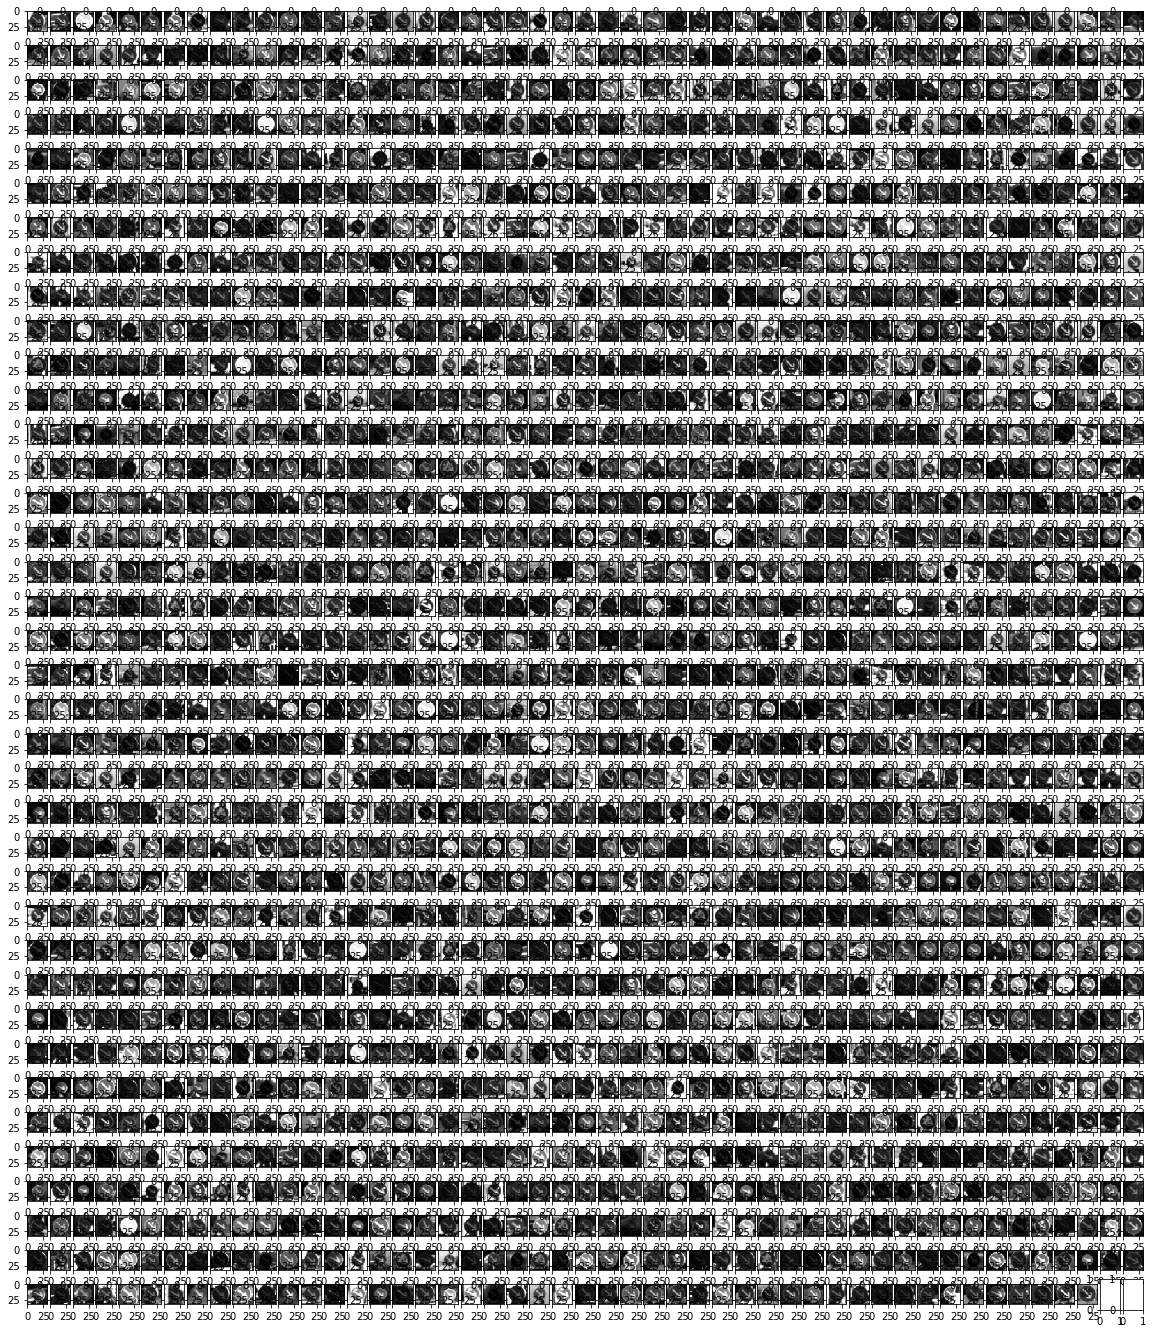

In [17]:
print(np.mean(X_train))
print(y_train2.shape)
ind=np.argwhere(y_train2==38)
print(ind.shape)
#
#print(img.shape)
fig,axs=plt.subplots(38,49,figsize=(20, 24))
fig.subplots_adjust(hspace = .10, wspace=.12)
axs=axs.ravel()
for i in range(len(ind)):
    #axs.axis('off')
    img=X_train_normalized2[ind[i]]
    axs[i].imshow(img.squeeze(),cmap='gray')


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 

I opted to generate more training data, as mentioned previously it makes the model more robust to the real world samples. Also in the orginal GTSRB dataset some classes have huge number of examples as compared to others, this might make the model biased towards the classes with more data. One way to prevent this is to augment data for classes with less number of examples. The 4 functions are used to generate the misssing data for a given class. At the end of augmentaion funciton, each of the class shall have atleast 800 samples. These new samples are generated by applying change in brightness -> rotation -> scalling -> translation to the existing samples of that class. 

Taking advantage of the variations in augmentaion, I made 2 sets of augmented data:
1. Normalized  gray scale image as input for augmentaion generating about 46480 samples.
2. Gray scale image as input and then Normalize the augmented data. Generating 49080 samples.

In total the training data consisted of 95560 samples.

Following is the distribution.

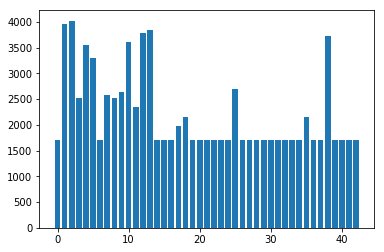

X, y shapes: (95560, 32, 32, 1) (95560,)
Class :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Count :  [1700 3960 4020 2520 3540 3300 1700 2580 2520 2640 3600 2340 3780 3840 1700
 1700 1700 1980 2160 1700 1700 1700 1700 1700 1700 2700 1700 1700 1700 1700
 1700 1700 1700 1700 1700 2160 1700 1700 3720 1700 1700 1700 1700]
-0.42459263605


In [22]:
# cnt of cls 
cls, cnt = np.unique(y_train, return_counts=True)
plt.bar(cls, cnt)
plt.show()

print('X, y shapes:', X_train.shape, y_train.shape)


print('Class : ', cls)

print('Count : ', cnt)

print(np.mean(X_train))

In [4]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

### Model Architecture

## Original LeNet Model Architecture


![LeNet](./markdownimages/LetnetOrginal.png)

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    lL1W=tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    lL1B=tf.Variable(tf.zeros(6))
    lL1C=tf.nn.conv2d(x,lL1W,strides=[1, 1, 1, 1], padding='VALID') + lL1B
    # TODO: Activation.
    lL1C=tf.nn.relu(lL1C)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    lL1C=tf.nn.max_pool(lL1C, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    lL2W=tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    lL2B=tf.Variable(tf.zeros(16))
    lL2C=tf.nn.conv2d(lL1C,lL2W,strides=[1, 1, 1, 1], padding='VALID') + lL2B
    # TODO: Activation.
    lL2C=tf.nn.relu(lL2C)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    lL2C=tf.nn.max_pool(lL2C, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat=flatten(lL2C)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    lL3W=tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    lL3B=tf.Variable(tf.zeros(120))
    lL3O=tf.matmul(flat,lL3W)+lL3B
    # TODO: Activation.
    lL3O=tf.nn.relu(lL3O)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    lL4W=tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    lL4B=tf.Variable(tf.zeros(84))
    lL4O=tf.add(tf.matmul(lL3O,lL4W),lL4B)
    # TODO: Activation.
    lL4O=tf.nn.relu(lL4O)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    lL5W=tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    lL5B=tf.Variable(tf.zeros(43))
    logits=tf.add(tf.matmul(lL4O,lL5W),lL5B)
    return logits

**notes**



## Modded Lenet - LeCun architecture



In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNetLeCu(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    lL1W=tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma),name='W1')
    lL1B=tf.Variable(tf.zeros(6),name='B1')
    lL1C=tf.nn.conv2d(x,lL1W,strides=[1, 1, 1, 1], padding='VALID') + lL1B
    # TODO: Activation.
    lL1C=tf.nn.relu(lL1C,name='C1')
    lL1C= tf.nn.dropout(lL1C, prob2)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    lL1C=tf.nn.max_pool(lL1C, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    lL2W=tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma),name='W2')
    lL2B=tf.Variable(tf.zeros(16),name='B2')
    lL2C=tf.nn.conv2d(lL1C,lL2W,strides=[1, 1, 1, 1], padding='VALID') + lL2B
    # TODO: Activation.
    lL2C=tf.nn.relu(lL2C,name='C2')
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    lL2C=tf.nn.max_pool(lL2C, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ##add extra conv layer by lecun
    # TODO: Layer 3: Convolutional. in=5x5x16 Output = 1x1x400.
    lL3W=tf.Variable(tf.truncated_normal(shape=(5, 5,16, 400), mean = mu, stddev = sigma),name='W3')
    lL3B=tf.Variable(tf.zeros(400),name='B3')
    lL3C=tf.nn.conv2d(lL2C,lL3W,strides=[1, 1, 1, 1], padding='VALID') + lL3B
    # TODO: Activation.
    lL3C=tf.nn.relu(lL3C,name='C3')
    
    
    # TODO: Flatten layer 2 and layer 3. Input = 400,400. Output = 800.
    flatlL2C=flatten(lL2C)
    flatlL3C=flatten(lL3C)
    flat=tf.concat([flatlL2C,flatlL3C],1)
    
    # intro of Dropout to avoid overfitting and dependency on specific activations
    flat = tf.nn.dropout(flat, prob)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
    lL4W=tf.Variable(tf.truncated_normal(shape=(800,120), mean = mu, stddev = sigma),name='W4')
    lL4B=tf.Variable(tf.zeros(120),name='B4')
    lL4O=tf.matmul(flat,lL4W)+lL4B
    # TODO: Activation.
    lL4O=tf.nn.relu(lL4O)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    lL5W=tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma),name='W5')
    lL5B=tf.Variable(tf.zeros(84),name='B5')
    lL5O=tf.add(tf.matmul(lL4O,lL5W),lL5B)
    # TODO: Activation.
    lL5O=tf.nn.relu(lL5O)
    
    #adding one more dropoutlayer
    lL5O=tf.nn.dropout(lL5O, probClassifier)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    lL6W=tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma),name='W6')
    lL6B=tf.Variable(tf.zeros(43),name='B6')
    logits=tf.add(tf.matmul(lL5O,lL6W),lL6B)
    return logits

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

prob = tf.placeholder(tf.float32)
probClassifier=tf.placeholder(tf.float32)
prob2=tf.placeholder(tf.float32)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture is as follows:

1. 5x5 convolution (32x32x1 in, 28x28x6 out)
2. ReLU
3. Dropout layer
4. 2x2 max pool (28x28x6 in, 14x14x6 out)
5. 5x5 convolution (14x14x6 in, 10x10x16 out)
6. ReLU
7. 2x2 max pool (10x10x16 in, 5x5x16 out)
8. 5x5 convolution (5x5x6 in, 1x1x400 out)
9. ReLu
10. Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
11. Concatenate flattened layers to a single size-800 layer
12. Dropout layer
13. Fully connected layer (800 in, 120 out)
14. Fully connected layer (120 in, 84 out)
15. Dropout layer
16. Fully connected layer (84 in, 43 out)
 

In [7]:
rate = 0.0009

logits = LeNetLeCu(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,prob: 1,probClassifier: 1,prob2 : 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [36]:
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (95560, 32, 32, 1) (95560,)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #X_train=X_train_normalized
    valacc=[]
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,prob: 0.6,probClassifier: 0.6,prob2: 0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        valacc.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetLecun_dataAugNew')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.895

EPOCH 2 ...
Validation Accuracy = 0.936

EPOCH 3 ...
Validation Accuracy = 0.947

EPOCH 4 ...
Validation Accuracy = 0.954

EPOCH 5 ...
Validation Accuracy = 0.963

EPOCH 6 ...
Validation Accuracy = 0.961

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.963

EPOCH 10 ...
Validation Accuracy = 0.964

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.962

EPOCH 13 ...
Validation Accuracy = 0.970

EPOCH 14 ...
Validation Accuracy = 0.964

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.968

EPOCH 17 ...
Validation Accuracy = 0.968

EPOCH 18 ...
Validation Accuracy = 0.962

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.960

EPOCH 21 ...
Validation Accuracy = 0.965

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

I used the Adam optimizer and reduce mean loss function. 

The hyperparameters were:
- batch size: 128
- epochs: 50
- learning rate: 0.0009
- mu: 0
- sigma: 0.1
- dropout-probabilities:
        Conv layer - 0.7
        FC1 layer  - 0.6
        FC3 layer  - 0.6

In [ ]:
exportDict={"Lenet":valacc}
pickle_out = open("LenetvalACC.pickle","wb")
pickle.dump(exportDict, pickle_out)
pickle_out.close()





In [23]:
pkl_file = open('LenetvalACC.pickle', 'rb')
mydict = pickle.load(pkl_file)
pkl_file.close()
#print(mydict)

# update dict and write to the file again
mydict.update({"lenetLecun_dataAug":valacc})
output = open('LenetvalACC.pickle', 'wb')
pickle.dump(mydict, output)
output.close()

pkl_file = open('LenetvalACC.pickle', 'rb')
mydict = pickle.load(pkl_file)
pkl_file.close()
#print(mydict)

In [37]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
   #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    saverNew = tf.train.import_meta_graph('./lenetLecun_dataAugNew.meta')
    saverNew.restore(sess,  './lenetLecun_dataAugNew')
   
    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    valida_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valida_accuracy))

INFO:tensorflow:Restoring parameters from ./lenetLecun_dataAugNew
Train Accuracy = 0.971
Test Accuracy = 0.943
Validation Accuracy = 0.964


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Intially I tried to use simple Lenet architecture with no data augmentation, the validation set accuracy was 92% and test set accuracy was around 91%.
After adding augmented data to the training set, for the same Lenet network, validation set accuracy was 94.4% and test accuracy was 93.2%. However the network was performance was not satisfactory in terms of detecting the extra images.

This inspired me to try out LeCun multiscale architecture. 

The implementation has a concatenation layer (layer 10) as suggested in LeCun architecture - Multiscale architecture, where a convolution layer output from intial layers contributes to the Fully connected(FC) layers. This techinique helps the model to generalise better on all available sample data.

However I also checked the performance of the LeCun Multiscale architecture without data augmentation, it was quite satisfactory with validation accuracy of  96%, but test accuracy had not improved as compared to Lenet architectue. This indicated that the model was not able to generalize as a consequence of over fitting.

The final network has Drop-out layers at a initial conv layer, this was added to prevent model from saturating to only certain activations from the convolution layer. Similar ideas apply for the dropout layer at first FC layer and last FC layer. Drop-outs also prevent network from overfitting.

Following table shows the parameters and accuracies for various architectures.

| Architecture                   	| Parameters         	| Validation Acc (%) 	| Test Acc (%) 	|
|--------------------------------	|--------------------	|--------------------	|--------------	|
| Lenet                          	| LR=0.0009,epocs=50 	| 92.00              	| 91           	|
| Lenet + Data Augmentation      	| LR=0.0009,epocs=50 	| 94.40              	| 93.2         	|
| Lenet Lecun                    	| LR=0.0009,epocs=50 	| 96.00              	| 93.5         	|
| Lenet Lecun + Data Augmentaion 	| LR=0.0009,epocs=50 	| 96.40              	| 94.3         	|


dict_keys(['Lenet', 'Lenet_dataAug', 'LenetLecun', 'lenetLecun_dataAug'])
0 Lenet
1 Lenet_dataAug
2 LenetLecun
3 lenetLecun_dataAug


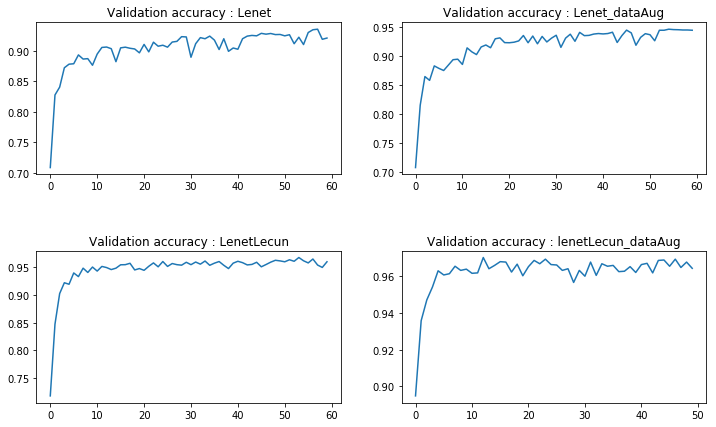

In [57]:
pkl_file = open('LenetvalACC.pickle', 'rb')
mydict = pickle.load(pkl_file)
print(mydict.keys())
fig, axs = plt.subplots(2,2,figsize=(12, 7))
fig.subplots_adjust(hspace = .5, wspace=.2)
axs=axs.ravel()
for i,j in zip(range(4),mydict.keys()):
    print(i,j)
    axs[i].plot(mydict[j])
    axs[i].set_title('Validation accuracy : {}'.format(j))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

222.0
222.0
255.0
255.0
254.0
213.666666667
254.666666667
242.333333333
139.114949544
0.0868355433146
(8, 32, 32, 1)
8


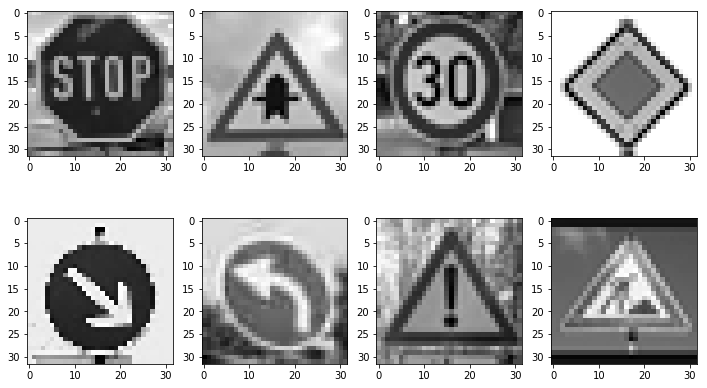

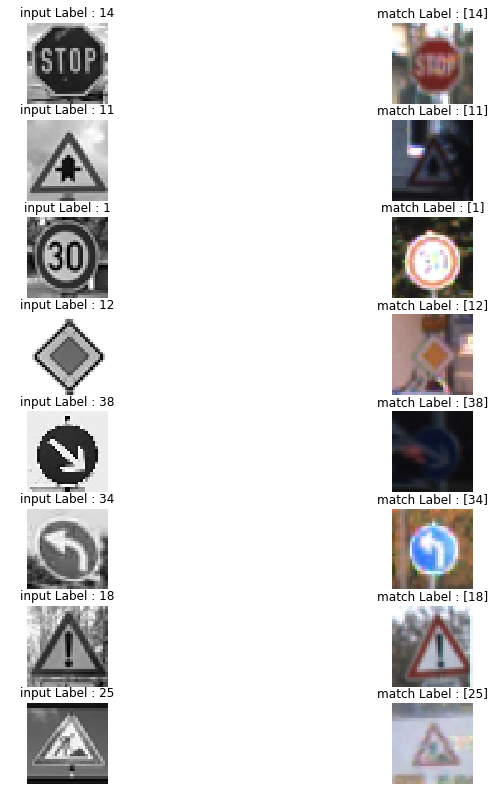

In [9]:
import cv2
import matplotlib.image as mpimg
import glob
X_In=[]
fig,axs=plt.subplots(2,4,figsize=(12, 7))
#fig.subplots_adjust(hspace = .05, wspace=.2)
axs = axs.ravel()
for i, img in enumerate(sorted(glob.glob('./ExtraImages/*.png'))):
    image=cv2.imread(img)
    #print(np.min(image))
    image=np.sum(image/3,axis=2, keepdims=True)
    #print(image.shape)
    #image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print(np.max(image))
    #image = (image - 128)/128 
    #image=image[:,:,np.newaxis]
    #
    
    #print(image.shape)
    axs[i].imshow(image[:,:,0],cmap='gray')
    #plt.imshow(X_In,cmap='gray')
    X_In.append(image)
    
Y_In=[14, 11, 1, 12, 38, 34, 18, 25]
X_In = np.asarray(X_In)
print(np.mean(X_In))
X_In=(X_In - 128)/128 
print(np.mean(X_In))
print(X_In.shape)
print(len(Y_In))


fig,axs=plt.subplots(len(X_In),2,figsize=(12, 14))
#fig.subplots_adjust(hspace = .05, wspace=.2)
axs = axs.ravel()
for i in range(len(X_In)):
    axs[2*i].axis('off')
    axs[2*i].imshow(X_In[i,:,:,0],cmap='gray')
    axs[2*i].set_title('input Label : {}'.format(Y_In[i]))
    ind=np.random.randint(0,1200)
    #index1 = np.argwhere(y_valid == guess1)[ind]
    axs[2*i+1].axis('off')
    index1 = np.argwhere(y_valid == Y_In[i])[0]
    axs[2*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
    axs[2*i+1].set_title('match Label : {}'.format(y_valid[index1]))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
   #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    saverNew2 = tf.train.import_meta_graph('./lenetLecun_dataAugNew.meta')
    saverNew2.restore(sess,  './lenetLecun_dataAugNew')
   
    test_accuracy = evaluate(X_In, Y_In)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenetLecun_dataAugNew
Test Accuracy = 1.000


**The network was able to predict all the signs correctly.**

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

INFO:tensorflow:Restoring parameters from ./lenetLecun_dataAugNew


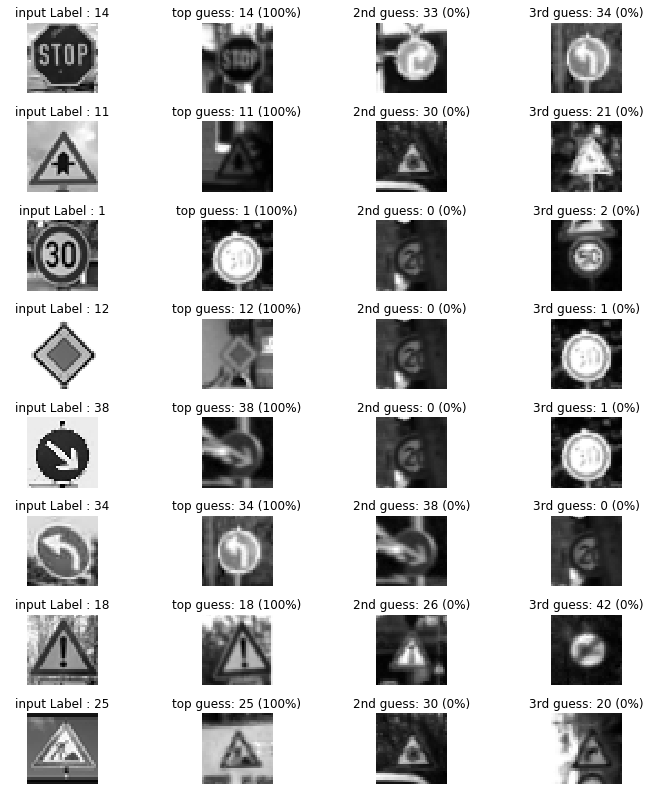

In [40]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saverNew3 = tf.train.import_meta_graph('./lenetLecun_dataAugNew.meta')
    saverNew3.restore(sess, "./lenetLecun_dataAugNew")
    X_In_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_In, prob: 1.0, probClassifier:1.0, prob2:1})
    X_In_top_k = sess.run(top_k, feed_dict={x: X_In, prob: 1.0, probClassifier:1.0, prob2:1})

    
    fig, axs = plt.subplots(len(X_In),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()
    #print(X_In_softmax_logits)
    #print(X_In_top_k)
    for i in range(len(X_In)):
        axs[4*i].axis('off')
        axs[4*i].imshow(X_In[i,:,:,0],cmap='gray')
        axs[4*i].set_title('input Label : {}'.format(Y_In[i]))
        guess1 = X_In_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*X_In_top_k[0][i][0]))
        guess2 = X_In_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*X_In_top_k[0][i][1]))
        guess3 = X_In_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*X_In_top_k[0][i][2]))


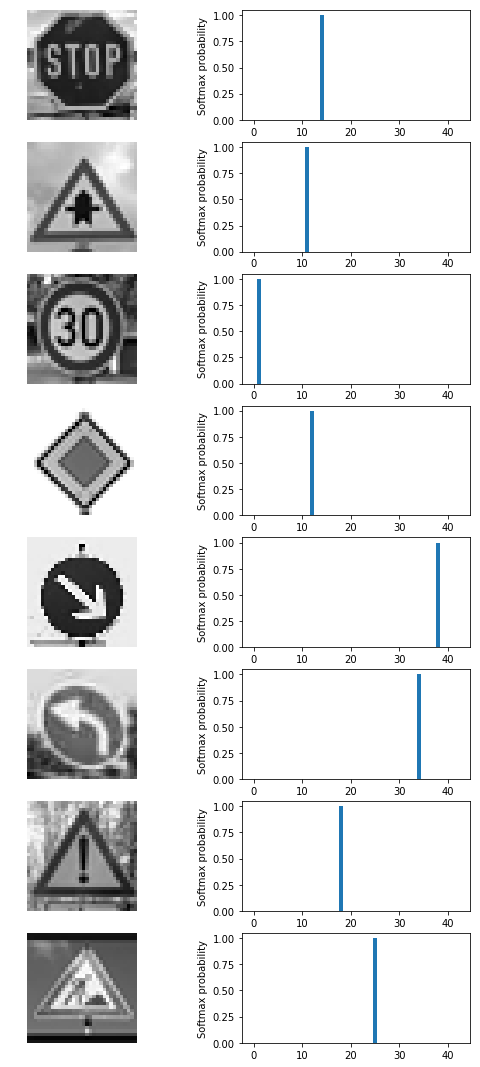

In [41]:

fig, axs = plt.subplots(8,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(X_In_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(X_In[(i)//2,:,:,0],cmap='gray')
    else:
        axs[i].bar(np.arange(n_classes), X_In_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

**Notes**
The network has predicted all the signs with 100% confidence. 
In the top 3 guesses, the 2nd and 3rd guesses have 0% confidence, this indicates the model is performing well on the real world data.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from ./lenetLecun_dataAugNew
(1, 32, 32, 1)
Feature maps of [Layer 2] and [Layer 3]


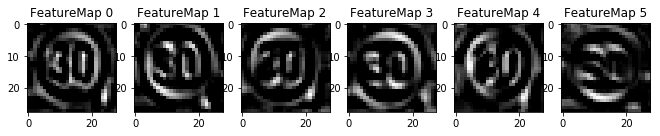

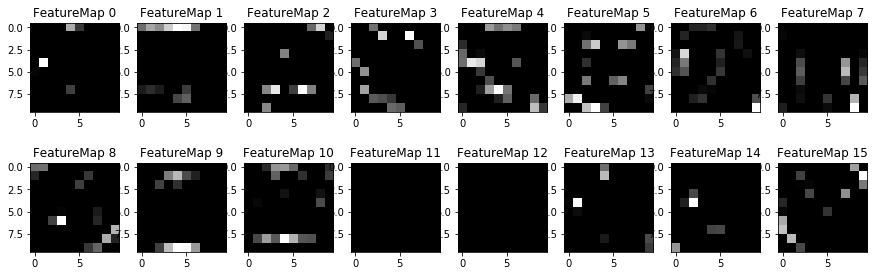

In [36]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,prob: 1,probClassifier: 1,prob2: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    activatioImg=X_In[2]
    activatioImg=np.asarray(activatioImg[np.newaxis,:,:])
    print(activatioImg.shape)
    
    print('Feature maps of [Layer 2] and [Layer 3]')    
    conv1 = sess.graph.get_tensor_by_name('C1:0')
    outputFeatureMap(activatioImg,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    
    conv2 = sess.graph.get_tensor_by_name('C2:0')
    outputFeatureMap(activatioImg,conv2, activation_min=-1, activation_max=-1, plt_num=2)
    